# Computação científica e análise de dados - 2023.2
# **Lista 3**: Interpolação, regressão e sistemas dinâmicos
## **Autor:** Artur Henrique Teixeira do Amaral
## **DRE:** 122032113

### Exercício 04

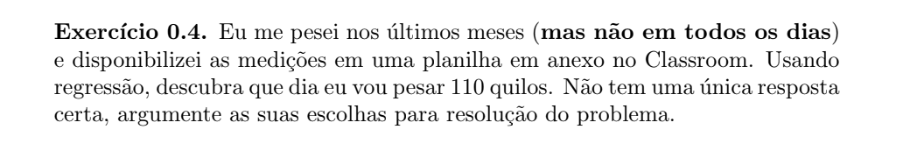

#### Pré-processamento dos dados

Os dados disponibilizados pelo professor possuem uma relação entre data do ano e peso em quilogramas. Para adequar melhor ao nosso ferramental matemático, transformei as datas em números inteiros, que representam a quantidade de dias passados desde o primeiro dia de medição, que foi 26/10. Essa etapa foi feita em Python por conta familiaridade minha com a linguagem. O arquivo tratado aqui já foi pré-processado anteriormente.

In [56]:
# Instalando pacotes necessários
import Pkg;
Pkg.add("DataFrames");
Pkg.add("CSV");

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [60]:
using CSV, DataFrames, LinearAlgebra

csv_file_path = "processed-pesagem.csv"

# Lê CSV em um dataframe.
df = CSV.File(csv_file_path, delim=',') |> DataFrame

# Extrai colunas do dataframe.
days = df[:, 1]
weights = df[:, 2]

# Converte DataFrame em arrays convencionais
days = collect(days);
weights = collect(weights);

size(days)

(68,)

Nesse ponto, o vetor *weights* possui as medições de peso do João, e *days* possui os dias decorridos a partir de 26 de outubro, que virou o elemento zero da lista.

Utilizarei um modelo linear como base da regressão, pois, dada uma observação inicial dos dados, não parece existr motivo para utilização de um modelo mais sofisticado.

Logo, sejam $w$ a variável independente que representa as medidas de peso e $d$ a variável que representa os dias após a medida inicial, temos o seguinte modelo:

\begin{equation}
d(w) = a_0 + a_1w
\end{equation}

Como temos 68 medições, temos uma matriz de Vandermonde $V_{68x2}$ representando os pesos no polinômio e uma matriz $b_{68x1}$ contendo os dias.

Iremos encontrar o vetor $a$ contendo nosso parâmetros de ajuste ao resolver a **equação normal do sistema linear obtido do modelo:

\begin{equation}
Va = b
\end{equation}

\begin{equation}
V^{t}Va = V^{t}b
\end{equation}

In [62]:
# Função fornecida pelo professor. Monta a matriz de Vandermonde conforme nossos dados.
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

# Função que implementa polinômio do primeiro grau.
function f(a, x)
    y = a[1] + a[2]*x
    return y
end

f (generic function with 1 method)

In [78]:
# Obtendo matrizes da equação normal.
b = days
V = vandermonde(weights, days, 1)

VtV = transpose(V) * V;
Vtb = transpose(V) * b;

# Resolvendo equação normal para a. Isso nos dá os coeficientes do polinômio.
a = VtV\Vtb

2-element Vector{Float64}:
 1576.9484267317455
  -12.93456085571097

In [76]:
result = f(x,110)
print("O peso 110 kg será atingido ")
print(trunc(Int,result))
println(" dias após a medição inicial.")

O peso 110 kg será atingido 154 dias após a medição inicial.


O resultado acima nos indica que, a partir de uma análise da tendência, o João pesará 110kg 154 dias após a primeira medida, que foi 26 de outubro. Ou seja, ele pesará 110kg por volta do dia 29 de março do ano seguinte.